<a href="https://colab.research.google.com/github/nudojacopo/thesis/blob/main/src/SYN/focus/size_vs_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
!git clone https://github.com/nudojacopo/thesis.git
from google.colab import drive
drive.mount('/content/drive')
root='/content/'
import sys
module_path = root+'thesis/src/SYN'
sys.path.append(module_path)
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
!pip install powerlaw
from SYN_package.functions import *
from SYN_package.estimate_parameters import *
import json
from scipy import stats
import random
from scipy.stats import chi2
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import powerlaw
import warnings

Cloning into 'thesis'...
remote: Enumerating objects: 1705, done.
remote: Counting objects: 100% (432/432), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 1705 (delta 253), reused 261 (delta 167), pack-reused 1273
Receiving objects: 100% (1705/1705), 76.33 MiB | 14.16 MiB/s, done.
Resolving deltas: 100% (1074/1074), done.
Mounted at /content/drive


## Prepare Data

In [114]:
rd=pd.read_csv('/content/drive/MyDrive/thesis/data/reddit/reddit_PRO.csv')
fb=pd.read_csv('/content/drive/MyDrive/thesis/data/facebook/facebook_news_PRO.csv')
vo=pd.read_csv('/content/drive/MyDrive/thesis/data/voat/voat_PRO.csv')
gb=pd.read_csv('/content/drive/MyDrive/thesis/data/gab/gab_PRO.csv')


fb=filter_first_h(fb,h)
gb=filter_first_h(gb,h)
rd=filter_first_h(rd,h)
vo=filter_first_h(vo,h)

names = ['gb','rd','fb','vo']
gb['social']='Gab'
datas = [gb,rd,fb,vo]

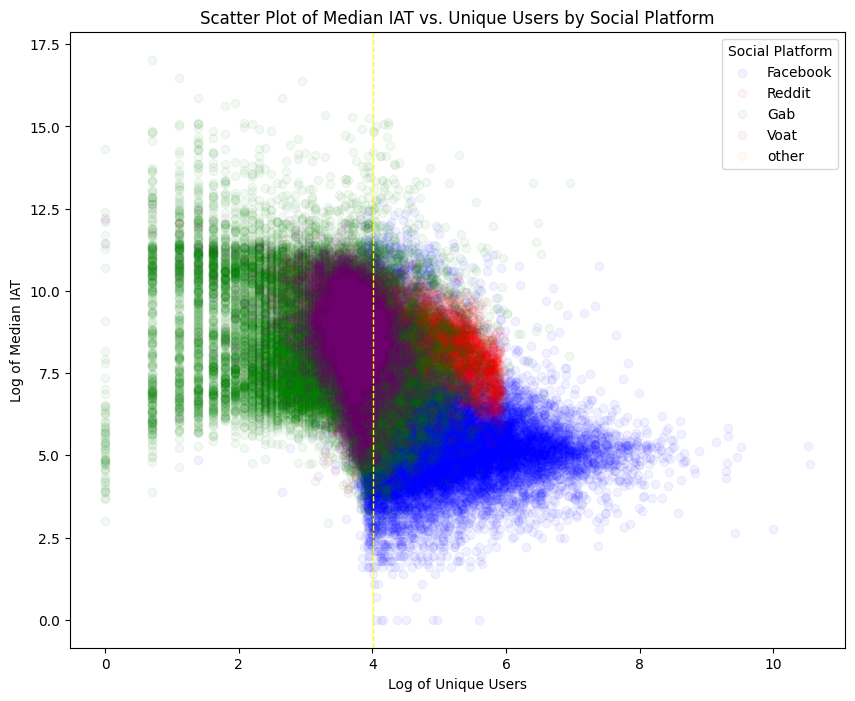

In [133]:
df = pd.concat(datas)
# Calculate the median of 'IAT_user_thread' per 'post_id' and 'user_id'
median_IAT = df.groupby(['post_id', 'user_id'])['IAT_user_thread'].max().reset_index()
median_IAT = median_IAT.groupby('post_id')['IAT_user_thread'].median().reset_index()
median_IAT.columns = ['post_id', 'Median_IAT']

# Calculate the number of unique 'user_id' per 'post_id'
unique_users = df.groupby('post_id')['user_id'].nunique().reset_index()
unique_users.columns = ['post_id', 'Unique_Users']

# Merge the two resulting DataFrames
merged = pd.merge(median_IAT, unique_users, on='post_id')

# Merge with the social column
social_data = df[['post_id', 'social']].drop_duplicates()
merged = pd.merge(merged, social_data, on='post_id')

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Map social platforms to colors
colors = {'Facebook': 'blue', 'Reddit': 'red', 'Gab': 'green', 'Voat': 'purple', 'other': 'orange'}

for social, color in colors.items():
    subset = merged[merged['social'] == social]
    plt.scatter(np.log(subset['Unique_Users']), np.log(subset['Median_IAT']), color=color, label=social, alpha=0.05, marker='o')
plt.axvline(x=np.log(55), color='yellow', linestyle='--', linewidth=1)
plt.title('Scatter Plot of Median IAT vs. Unique Users by Social Platform')
plt.xlabel('Log of Unique Users')
plt.ylabel('Log of Median IAT')
plt.legend(title='Social Platform')
plt.show()




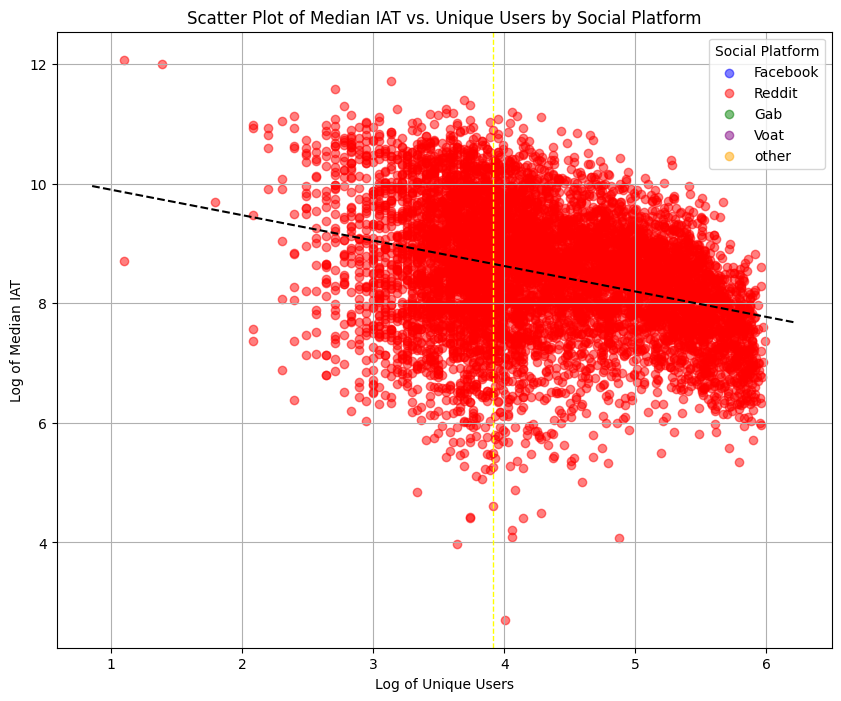

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Concatenate the data
df = rd#pd.concat(datas)

# Calculate the median of 'IAT_user_thread' per 'post_id' and 'user_id'
median_IAT = df.groupby(['post_id', 'user_id'])['IAT_user_thread'].max().reset_index()
median_IAT = median_IAT.groupby('post_id')['IAT_user_thread'].median().reset_index()
median_IAT.columns = ['post_id', 'Median_IAT']

# Calculate the number of unique 'user_id' per 'post_id'
unique_users = df.groupby('post_id')['user_id'].nunique().reset_index()
unique_users.columns = ['post_id', 'Unique_Users']

# Merge the two resulting DataFrames
merged = pd.merge(median_IAT, unique_users, on='post_id')

# Merge with the social column
social_data = df[['post_id', 'social']].drop_duplicates()
merged = pd.merge(merged, social_data, on='post_id')

# Log-transform the data
merged['Log_Unique_Users'] = np.log(merged['Unique_Users'])
merged['Log_Median_IAT'] = np.log(merged['Median_IAT'])

# Prepare data for linear regression
X = merged[['Log_Unique_Users']].values
y = merged['Log_Median_IAT'].values

# Fit the linear regression model
reg = LinearRegression().fit(X, y)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Map social platforms to colors
colors = {'Facebook': 'blue', 'Reddit': 'red', 'Gab': 'green', 'Voat': 'purple', 'other': 'orange'}

for social, color in colors.items():
    subset = merged[merged['social'] == social]
    plt.scatter(subset['Log_Unique_Users'], subset['Log_Median_IAT'], color=color, label=social, alpha=0.5, marker='o')

# Plot the regression line
x_vals = np.array(plt.gca().get_xlim())
y_vals = reg.intercept_ + reg.coef_ * x_vals
plt.plot(x_vals, y_vals, '--', color='black')

# Add a vertical line at log(55)
plt.axvline(x=np.log(50), color='yellow', linestyle='--', linewidth=1)

plt.title('Scatter Plot of Median IAT vs. Unique Users by Social Platform')
plt.xlabel('Log of Unique Users')
plt.ylabel('Log of Median IAT')
plt.legend(title='Social Platform')
plt.grid(True)
plt.show()


In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Concatenate the data
df = fb#pd.concat(datas)

# Calculate the median of 'IAT_user_thread' per 'post_id' and 'user_id'
median_IAT = df.groupby(['post_id', 'user_id'])['IAT_user_thread'].max().reset_index()
median_IAT = median_IAT.groupby('post_id')['IAT_user_thread'].median().reset_index()
median_IAT.columns = ['post_id', 'Median_IAT']

# Calculate the number of unique 'user_id' per 'post_id'
unique_users = df.groupby('post_id')['user_id'].nunique().reset_index()
unique_users.columns = ['post_id', 'Unique_Users']

# Merge the two resulting DataFrames
merged = pd.merge(median_IAT, unique_users, on='post_id')

# Merge with the social column
social_data = df[['post_id', 'social']].drop_duplicates()
merged = pd.merge(merged, social_data, on='post_id')

# Log-transform the data
merged['Log_Unique_Users'] = np.log(merged['Unique_Users'])
merged['Log_Median_IAT'] = np.log(merged['Median_IAT'])

# Prepare data for linear regression
merged = merged.dropna(subset=['Log_Unique_Users', 'Log_Median_IAT'])
X = merged[['Log_Unique_Users']].values
y = merged['Log_Median_IAT'].values

# Fit the linear regression model
reg = LinearRegression().fit(X, y)


# Create a scatter plot
plt.figure(figsize=(10, 8))

# Map social platforms to colors
colors = {'Facebook': 'blue', 'Reddit': 'red', 'Gab': 'green', 'Voat': 'purple', 'other': 'orange'}

for social, color in colors.items():
    subset = merged[merged['social'] == social]
    plt.scatter(subset['Log_Unique_Users'], subset['Log_Median_IAT'], color=color, label=social, alpha=0.5, marker='o')

# Plot the regression line
x_vals = np.array(plt.gca().get_xlim())
y_vals = reg.intercept_ + reg.coef_ * x_vals
plt.plot(x_vals, y_vals, '--', color='black')

# Add a vertical line at log(55)
plt.axvline(x=np.log(50), color='yellow', linestyle='--', linewidth=1)

plt.title('Scatter Plot of Median IAT vs. Unique Users by Social Platform')
plt.xlabel('Log of Unique Users')
plt.ylabel('Log of Median IAT')
plt.legend(title='Social Platform')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Input y contains infinity or a value too large for dtype('float64').